In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [143]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,NaN,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90.0,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100.0,0
99997,Male,66.0,0,0,former,27.83,5.7,155.0,0
99998,Female,24.0,0,0,never,35.42,4.0,100.0,0


In [144]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  99987 non-null   float64
 6   HbA1c_level          99986 non-null   float64
 7   blood_glucose_level  99965 non-null   float64
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


In [146]:
df.shape

(100000, 9)

In [147]:
stats = df.describe()

In [148]:
stats

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,99987.000000,99986.000000,99965.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320777,5.527484,138.054659,0.085000
std,22.516840,0.26315,0.194593,6.636772,1.070606,40.708218,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,5.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [149]:
df.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [150]:
missing_values = df.isnull().sum()

In [151]:
missing_values

gender                  0
age                     0
hypertension            0
heart_disease           0
smoking_history         0
bmi                    13
HbA1c_level            14
blood_glucose_level    35
diabetes                0
dtype: int64

In [175]:
# 1) EDA (exploratory data analysis) and give insights using graphical representation

C:\Users\Muhammad Javed Iqbal\Documents\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


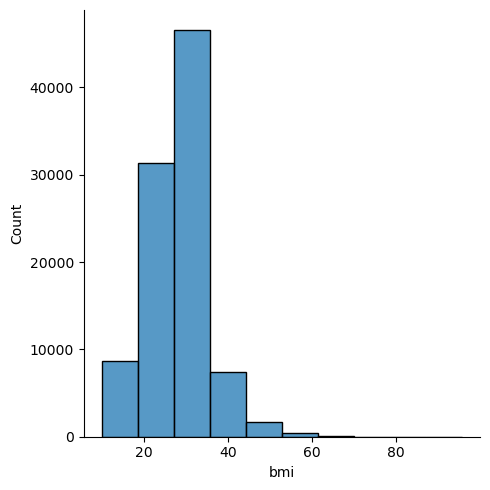

In [208]:
sns.displot(df['bmi'], bins=10)

C:\Users\Muhammad Javed Iqbal\Documents\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


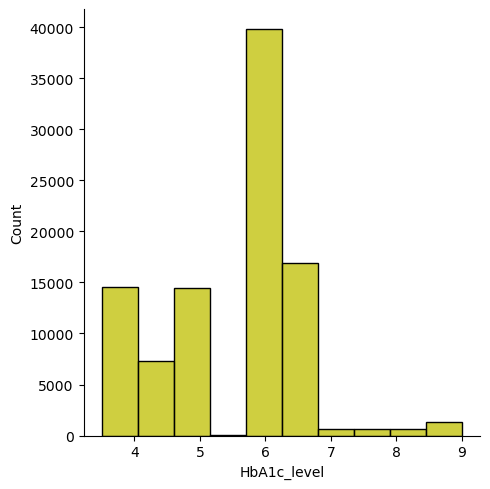

In [206]:
sns.displot(df['HbA1c_level'], bins=10, color = "y")

C:\Users\Muhammad Javed Iqbal\Documents\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


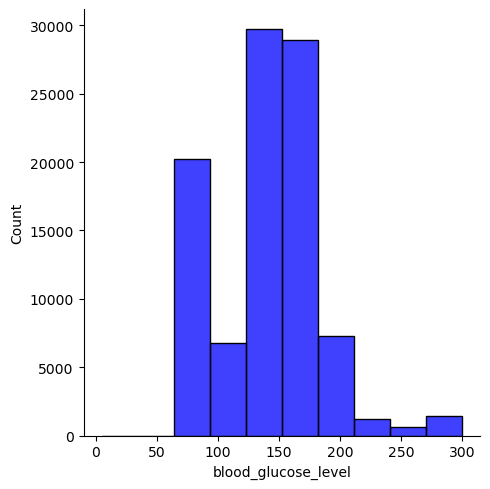

In [205]:
sns.displot(df['blood_glucose_level'], bins=10, color = "b")

C:\Users\Muhammad Javed Iqbal\Documents\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


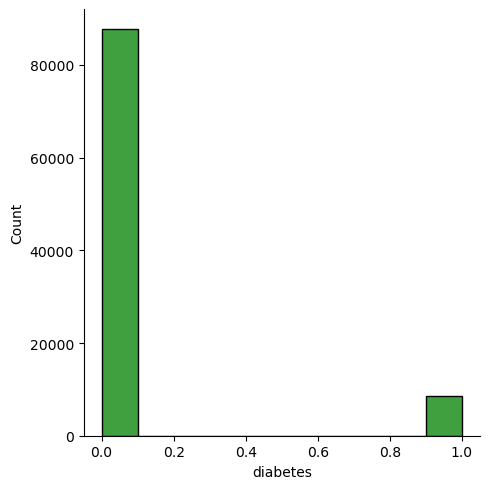

In [204]:
sns.displot(df['diabetes'], bins=10, color = "g")

C:\Users\Muhammad Javed Iqbal\AppData\Local\Temp\ipykernel_16092\3791094691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HbA1c_level'], color = "g")


<Axes: xlabel='HbA1c_level', ylabel='Density'>

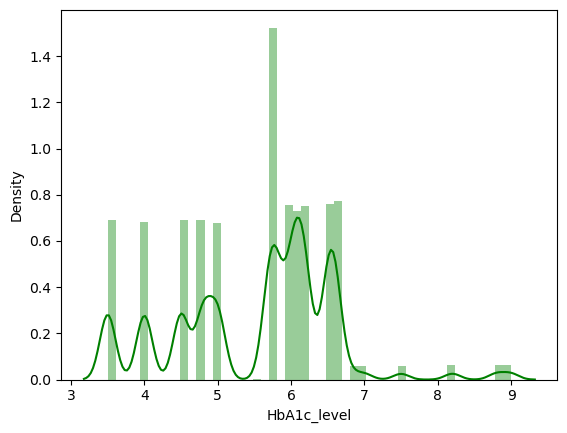

In [192]:
sns.distplot(df['HbA1c_level'], color = "g")

<Axes: >

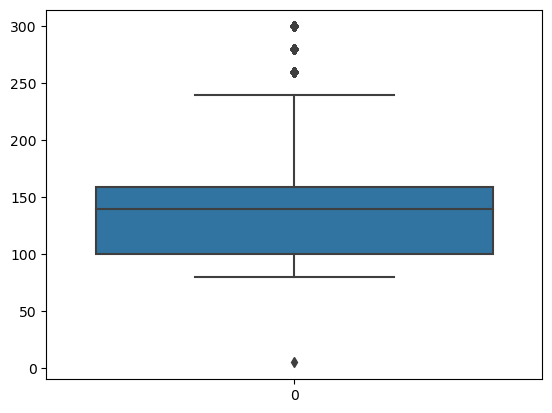

In [193]:
sns.boxplot( df['blood_glucose_level'] )

<Axes: >

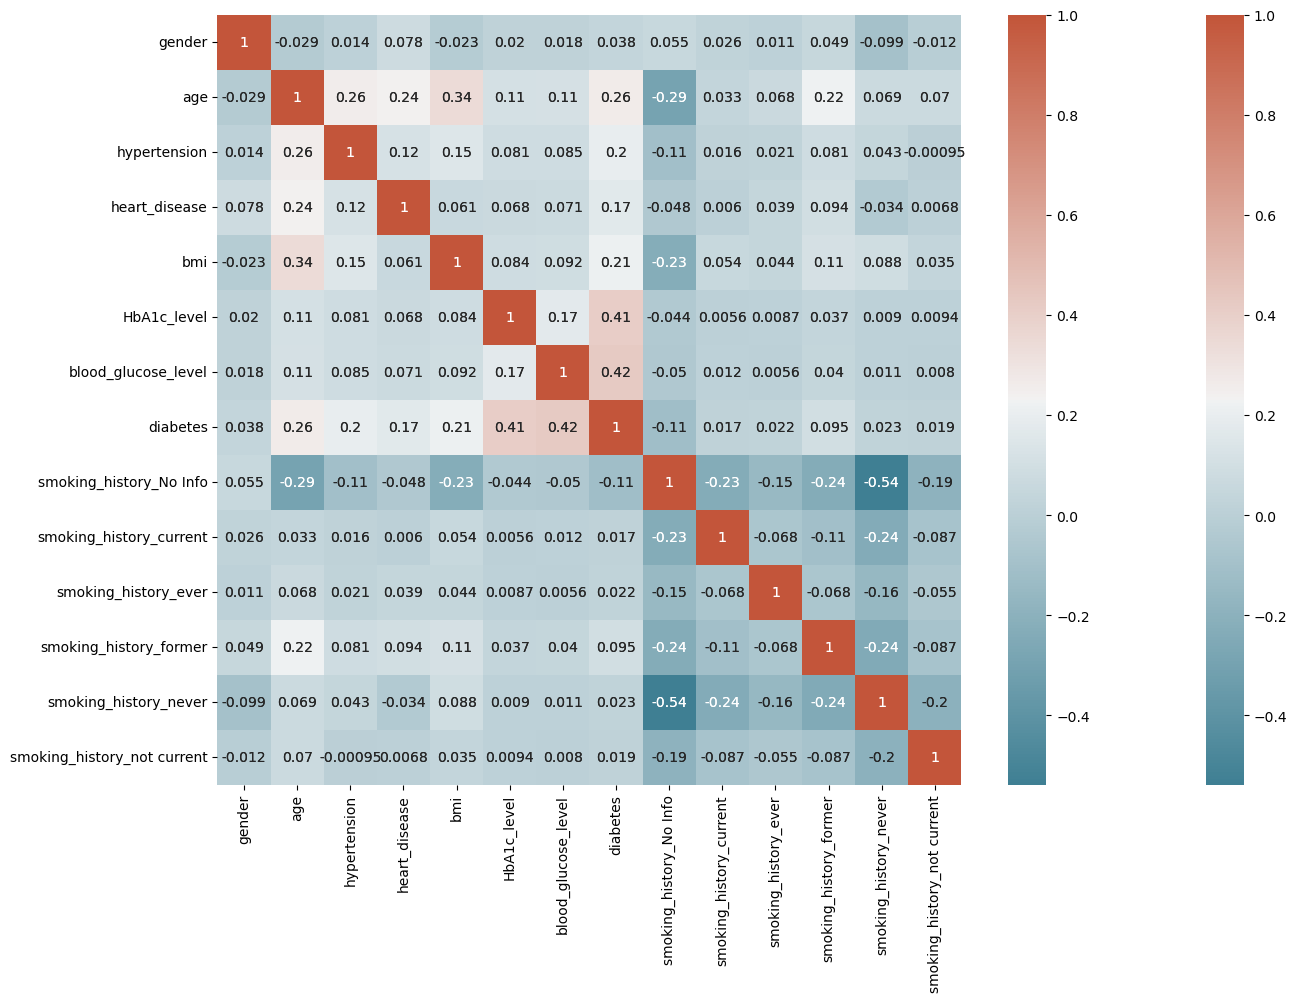

In [194]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [176]:
# 2) Remove any unwanted noise identified in step 1, using necessary preprocessing techniques

In [153]:
df.drop_duplicates(inplace=True)

In [154]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,NaN,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145.0,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100.0,0
99997,Male,66.0,0,0,former,27.83,5.7,155.0,0
99998,Female,24.0,0,0,never,35.42,4.0,100.0,0


In [155]:
missing_values

gender                  0
age                     0
hypertension            0
heart_disease           0
smoking_history         0
bmi                    13
HbA1c_level            14
blood_glucose_level    35
diabetes                0
dtype: int64

In [156]:
df.dropna()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0
5,Female,20.0,0,0,never,27.32,6.6,85.0,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145.0,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100.0,0
99997,Male,66.0,0,0,former,27.83,5.7,155.0,0
99998,Female,24.0,0,0,never,35.42,4.0,100.0,0


In [158]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [159]:
df = pd.get_dummies(df, columns=['smoking_history'])

In [160]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140.0,0,False,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80.0,0,True,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,NaN,0,False,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155.0,0,False,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155.0,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,24.60,4.8,145.0,0,True,False,False,False,False,False
99996,0,2.0,0,0,17.37,6.5,100.0,0,True,False,False,False,False,False
99997,1,66.0,0,0,27.83,5.7,155.0,0,False,False,False,True,False,False
99998,0,24.0,0,0,35.42,4.0,100.0,0,False,False,False,False,True,False


In [161]:
df.fillna(df.mean(), inplace=True)

In [182]:
df.corr()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
gender,1.000000,-0.028955,0.014016,0.078317,-0.023463,0.019765,0.017885,0.037622,0.055140,0.025778,0.010523,0.049017,-0.098970,-0.011615
age,-0.028955,1.000000,0.257298,0.238444,0.344754,0.106634,0.114404,0.264920,-0.294210,0.033427,0.068179,0.221797,0.069268,0.069872
hypertension,0.014016,0.257298,1.000000,0.119985,0.148120,0.081413,0.084856,0.195714,-0.111542,0.015643,0.021182,0.080945,0.042553,-0.000946
heart_disease,0.078317,0.238444,0.119985,1.000000,0.061380,0.068154,0.070848,0.170714,-0.048200,0.006035,0.039472,0.093667,-0.033727,0.006813
bmi,-0.023463,0.344754,0.148120,0.061380,1.000000,0.084360,0.092454,0.214945,-0.229299,0.053935,0.044399,0.111781,0.088163,0.035210
HbA1c_level,0.019765,0.106634,0.081413,0.068154,0.084360,1.000000,0.171568,0.406231,-0.044148,0.005589,0.008724,0.036930,0.008974,0.009418
blood_glucose_level,0.017885,0.114404,0.084856,0.070848,0.092454,0.171568,1.000000,0.424248,-0.049944,0.011944,0.005593,0.040408,0.010723,0.007967
diabetes,0.037622,0.264920,0.195714,0.170714,0.214945,0.406231,0.424248,1.000000,-0.112584,0.017043,0.021919,0.095497,0.023136,0.018927
smoking_history_No Info,0.055140,-0.294210,-0.111542,-0.048200,-0.229299,-0.044148,-0.049944,-0.112584,1.000000,-0.234502,-0.150188,-0.235937,-0.538176,-0.192015
smoking_history_current,0.025778,0.033427,0.015643,0.006035,0.053935,0.005589,0.011944,0.017043,-0.234502,1.000000,-0.067739,-0.106415,-0.242733,-0.086605


In [181]:
# 3) Enhance the features if the transformation is required. Split the dataset into training and testing sets

In [167]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [186]:
# 4) Provide the standardized dataset for further analysis

In [169]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [171]:
y_pred = clf.predict(X_test)

In [189]:
# 5) Provide a classification mechanism and validate it using different validation metrics

In [196]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [197]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9683323800114398
Precision: 0.940080971659919
Recall: 0.6845518867924528
F1 Score: 0.7922210849539405
Confusion Matrix:
[[17461    74]
 [  535  1161]]
